In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=625c8b53ac5bd9769d3b67f7610ba596


In [79]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mehamn
Processing Record 2 of Set 13 | chok chai
Processing Record 3 of Set 13 | castro
Processing Record 4 of Set 13 | katsuura
Processing Record 5 of Set 13 | georgetown
Processing Record 6 of Set 13 | khipro
Processing Record 7 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 13 | anadyr
Processing Record 9 of Set 13 | lavrentiya
Processing Record 10 of Set 13 | vaini
Processing Record 11 of Set 13 | mandalgovi
Processing Record 12 of Set 13 | ponta do sol
Processing Record 13 of Set 13 | arraial do cabo
Processing Record 14 of Set 13 | east london
Processing Record 15 of Set 13 | rome
Processing Record 16 of Set 13 | tiznit
Processing Record 17 of Set 13 | kavaratti
Processing Record 18 of Set 13 | malaia
Processing Record 19 of Set 13 | hobart
Processing Record 20 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 13 | imbitu

Processing Record 29 of Set 16 | leshukonskoye
Processing Record 30 of Set 16 | yenagoa
Processing Record 31 of Set 16 | dingle
Processing Record 32 of Set 16 | pontes e lacerda
Processing Record 33 of Set 16 | beringovskiy
Processing Record 34 of Set 16 | cape town
Processing Record 35 of Set 16 | butaritari
Processing Record 36 of Set 16 | deniliquin
Processing Record 37 of Set 16 | afmadu
City not found. Skipping...
Processing Record 38 of Set 16 | ishinomaki
Processing Record 39 of Set 16 | tilichiki
Processing Record 40 of Set 16 | saskylakh
Processing Record 41 of Set 16 | hai phong
City not found. Skipping...
Processing Record 42 of Set 16 | nizhniy tsasuchey
Processing Record 43 of Set 16 | leninskoye
Processing Record 44 of Set 16 | bredasdorp
Processing Record 45 of Set 16 | gavrilovka vtoraya
Processing Record 46 of Set 16 | bluff
Processing Record 47 of Set 16 | titel
Processing Record 48 of Set 16 | margate
Processing Record 49 of Set 16 | hachinohe
Processing Record 50 of

Processing Record 14 of Set 20 | mapiripan
Processing Record 15 of Set 20 | new norfolk
Processing Record 16 of Set 20 | byron bay
Processing Record 17 of Set 20 | kupino
Processing Record 18 of Set 20 | barawe
City not found. Skipping...
Processing Record 19 of Set 20 | gat
Processing Record 20 of Set 20 | chicama
Processing Record 21 of Set 20 | baiyin
Processing Record 22 of Set 20 | marzuq
Processing Record 23 of Set 20 | santa eulalia del rio
City not found. Skipping...
Processing Record 24 of Set 20 | alta floresta
Processing Record 25 of Set 20 | pizarro
Processing Record 26 of Set 20 | praxedis guerrero
Processing Record 27 of Set 20 | vuktyl
Processing Record 28 of Set 20 | ustye
Processing Record 29 of Set 20 | rawson
Processing Record 30 of Set 20 | saldanha
Processing Record 31 of Set 20 | gursahaiganj
Processing Record 32 of Set 20 | haines junction
Processing Record 33 of Set 20 | tadine
Processing Record 34 of Set 20 | zlatoustovsk
City not found. Skipping...
Processing 

Processing Record 49 of Set 23 | lakatoro
Processing Record 50 of Set 23 | fortuna
Processing Record 1 of Set 24 | bera
Processing Record 2 of Set 24 | maningrida
Processing Record 3 of Set 24 | hukuntsi
Processing Record 4 of Set 24 | aksarayskiy
Processing Record 5 of Set 24 | pocoes
Processing Record 6 of Set 24 | bakchar
Processing Record 7 of Set 24 | urengoy
Processing Record 8 of Set 24 | catamarca
Processing Record 9 of Set 24 | alyangula
Processing Record 10 of Set 24 | srednekolymsk
Processing Record 11 of Set 24 | balagansk
Processing Record 12 of Set 24 | el limon
Processing Record 13 of Set 24 | bangarapet
Processing Record 14 of Set 24 | tenango
Processing Record 15 of Set 24 | khandyga
Processing Record 16 of Set 24 | ucluelet
Processing Record 17 of Set 24 | kakching
Processing Record 18 of Set 24 | tonj
Processing Record 19 of Set 24 | takoradi
Processing Record 20 of Set 24 | qasigiannguit
Processing Record 21 of Set 24 | pushkar
Processing Record 22 of Set 24 | fowa


In [80]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mehamn,71.0357,27.8492,33.80,86,75,8.05,NO,2021-03-30 03:54:03
1,Chok Chai,14.7284,102.1652,104.00,75,0,11.50,TH,2021-03-30 03:54:03
2,Castro,-24.7911,-50.0119,60.46,97,9,3.31,BR,2021-03-30 03:54:03
3,Katsuura,35.1333,140.3000,72.00,73,75,3.44,JP,2021-03-30 03:51:12
4,Georgetown,5.4112,100.3354,87.80,83,20,4.61,MY,2021-03-30 03:54:04
5,Khipro,25.8285,69.3772,85.71,48,15,3.91,PK,2021-03-30 03:54:04
6,Anadyr,64.7500,177.4833,5.00,85,20,24.61,RU,2021-03-30 03:54:04
7,Lavrentiya,65.5833,-171.0000,11.80,86,100,10.04,RU,2021-03-30 03:54:05
8,Vaini,-21.2000,-175.2000,82.40,83,75,8.05,TO,2021-03-30 03:54:05
9,Mandalgovi,45.7625,106.2708,44.85,30,1,20.87,MN,2021-03-30 03:54:05


In [45]:
new_column_order = ["City", "Country", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,mehamn,NO,71.0357,27.8492,32.00,59,75,16.11
1,chok chai,TH,14.7284,102.1652,82.00,91,100,3.67
2,castro,BR,-24.7911,-50.0119,65.48,91,79,2.89
3,katsuura,JP,35.1333,140.3000,57.00,58,0,4.61
4,georgetown,MY,5.4112,100.3354,78.80,94,20,2.30
5,khipro,PK,25.8285,69.3772,79.03,18,0,1.66
6,anadyr,RU,64.7500,177.4833,5.00,72,20,8.95
7,lavrentiya,RU,65.5833,-171.0000,5.90,81,32,1.23
8,vaini,TO,-21.2000,-175.2000,82.40,83,75,9.22
9,mandalgovi,MN,45.7625,106.2708,28.96,46,2,8.57


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

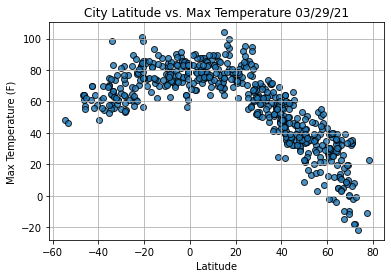

In [99]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

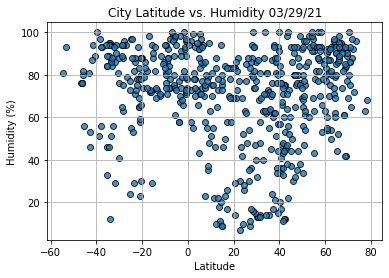

In [100]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

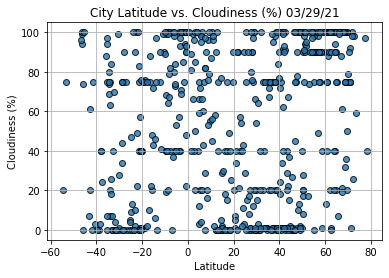

In [101]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

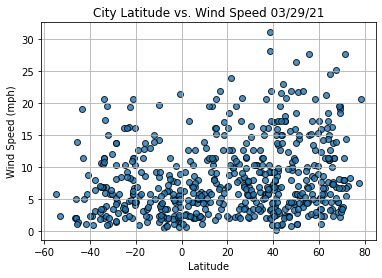

In [102]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [103]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [104]:
index13 = city_data_df.loc[13]

In [105]:
index13

City                         Rome
Lat                        34.257
Lng                      -85.1647
Max Temp                     51.8
Humidity                       62
Cloudiness                      1
Wind Speed                    3.2
Country                        US
Date          2021-03-30 03:52:40
Name: 13, dtype: object

In [106]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
561     True
562    False
563    False
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [107]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mehamn,71.0357,27.8492,33.80,86,75,8.05,NO,2021-03-30 03:54:03
1,Chok Chai,14.7284,102.1652,104.00,75,0,11.50,TH,2021-03-30 03:54:03
3,Katsuura,35.1333,140.3000,72.00,73,75,3.44,JP,2021-03-30 03:51:12
4,Georgetown,5.4112,100.3354,87.80,83,20,4.61,MY,2021-03-30 03:54:04
5,Khipro,25.8285,69.3772,85.71,48,15,3.91,PK,2021-03-30 03:54:04
...,...,...,...,...,...,...,...,...,...
559,Nishihara,26.1842,127.7558,77.00,88,90,17.27,JP,2021-03-30 03:56:10
560,Olovyannaya,50.9500,115.5667,36.54,54,100,3.53,RU,2021-03-30 03:56:10
561,Nemuro,43.3236,145.5750,59.00,38,20,17.27,JP,2021-03-30 03:56:11
564,Tigil,57.8000,158.6667,32.13,91,100,8.25,RU,2021-03-30 03:56:12


In [108]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mehamn,71.0357,27.8492,33.80,86,75,8.05,NO,2021-03-30 03:54:03
1,Chok Chai,14.7284,102.1652,104.00,75,0,11.50,TH,2021-03-30 03:54:03
3,Katsuura,35.1333,140.3000,72.00,73,75,3.44,JP,2021-03-30 03:51:12
4,Georgetown,5.4112,100.3354,87.80,83,20,4.61,MY,2021-03-30 03:54:04
5,Khipro,25.8285,69.3772,85.71,48,15,3.91,PK,2021-03-30 03:54:04


In [109]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

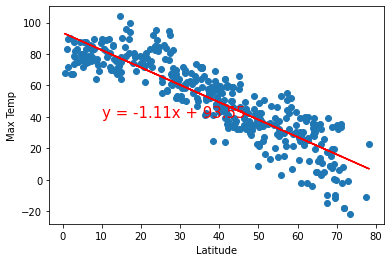

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

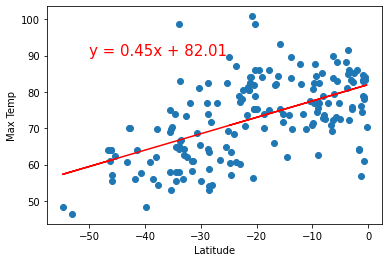

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


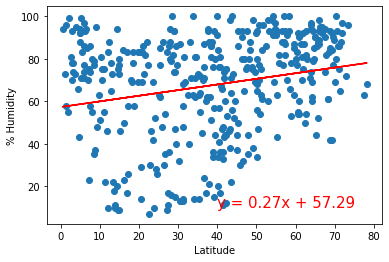

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-113-9c3e8b244753>, line 6)

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))


SyntaxError: EOL while scanning string literal (<ipython-input-114-3dc99b339452>, line 6)

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))


SyntaxError: EOL while scanning string literal (<ipython-input-115-7024af74f12d>, line 6)

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-116-8c4f0e57bb27>, line 6)